# King County Housing Linear Regression Project


* Student name: Seyma Tas
* Student pace:  Full time
* Scheduled project review date/time: 05-04-2020
* Instructor name: Amber Yandow
* Blog post URL:


## OSEMN Approach
1 - Obtaining the data 2 - Scrubbing the data 3 - Exploring the data 4 - Modeling the data 5 - iNterpreting the results


![title](picture2.png)


## Questions:

1) What are the main factors to predict the price of a house?

2) How much does a middle income family should invest to buy a standard house?
   
   or What are the properties of a house you can buy in King County if your budget is $400,000???
    
3) How can a middle income family increase the price of their house by %20 by spending %5 of the house cost???

4) Basement
 

In [1]:
%autosave 10

Autosaving every 10 seconds


In [ ]:
# # Print all the interactive output without resorting to print
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## Import the necessary packages

First, we’ll import all of our necessary packages.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
# import sklearn as sk 



In [ ]:
# ## Display more information 
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

## Import the data set

Next, we’ll import our data and see what we’re working with. 

In [3]:
df=pd.read_csv('kc_house_data.csv')

Lets see what the data looks like by functions head(), tail(), shape(), info() and describe().

In [4]:
df.head()
df.tail()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
df.shape

(21597, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Buraya describe ile ilgili yorum yaz

## Check the numbers of missing values

In [8]:
print(df.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [9]:
df.isnull().values.any()

True

# Buraya na values  ile ilgili yorum yaz


## Identifying Categorical Variables

# Drop unnecessary columns

In [10]:
df=df.drop(['id','date'],axis=1)

# Outliers

In [ ]:
# df_filtered=df.drop(['sqft_basement' ], axis=1)

In [12]:
Q1 = df.quantile(0.005)
Q3 = df.quantile(0.98)
IQR = Q3 - Q1

df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

## Check the distributions and do log transformations

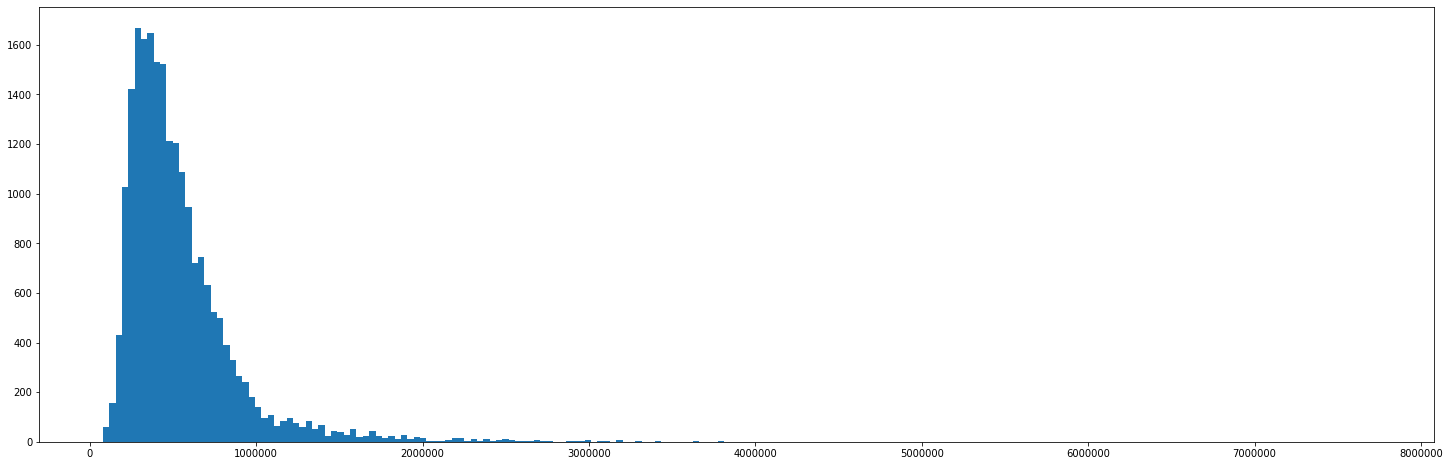

In [13]:
# df['price'].hist(bins=100)
fig, ax = plt.subplots(figsize=(25,8))
ax=plt.hist(df['price'], bins=200)
# df.price.hist(bins=200)
plt.show()

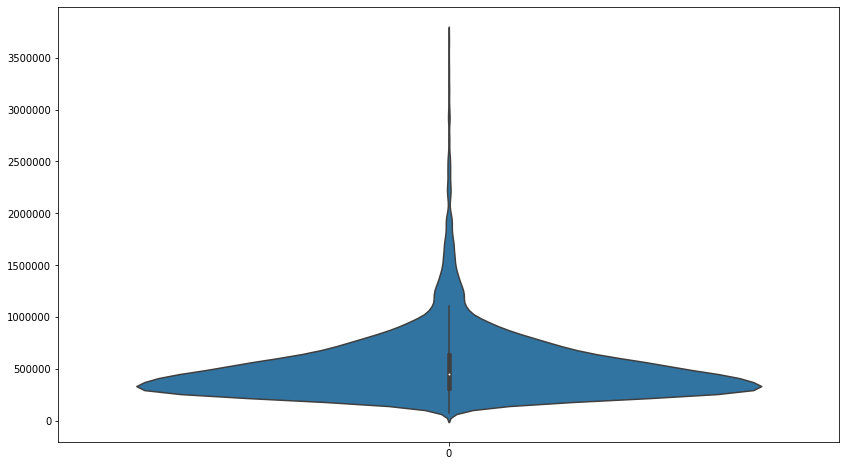

In [14]:
fig, ax = plt.subplots(figsize=(14,8))
sns.violinplot(ax=ax, data=df_no_outliers['price'])
plt.show()

### Df_medium_income


In [ ]:
# df_medium_income=df.drop(df[df.price > 2000000].index)
# df_medium_income

In [ ]:
# fig, ax = plt.subplots(figsize=(14,8))
# sns.distplot(df_medium_income['price'], bins=70,color='red' )
# # ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},
# #     ...                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
# #     ...                   hist_kws={"histtype": "step", "linewidth": 3,
# #     ...                             "alpha": 1, "color": "g"})
# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(14,8))
# sns.violinplot(ax=ax, data=df_medium_income['price'])
# plt.show()

### sqft_lot15

In [ ]:
# fig, ax = plt.subplots(figsize=(15,8))
# ax=plt.hist(df['sqft_lot15'], bins=100)

# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(15,8))
# ax=plt.hist(df_medium_income['sqft_lot15'], bins=100)
# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(15,8))
# ax=plt.hist(df_medium_income['sqft_lot15'], bins=100)
# plt.show()

In [ ]:
# df_medium_sqft_lot15=df.drop(df[df['sqft_lot15'] > 30000].index)
# df_medium_sqft_lot15



In [ ]:
# fig, ax = plt.subplots(figsize=(20,8))
# ax=plt.hist(df_medium_sqft_lot15['sqft_lot'], bins=100)
# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(15,12))
# ax=sns.violinplot(ax=ax, data=df['sqft_lot'])
# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(15,12))
# sns.violinplot(ax=ax, data=df_medium_income['sqft_lot'])
# plt.show()

In [ ]:
# df['sqft_lot15'].sort_values().tail(5)

In [ ]:
# df_medium_income['sqft_lot15'].sort_values().tail()

### View
It is unclear what this feature indicates because one source suggests it is whether the property has
been viewed and another suggests it is a measure of the quality of the view from the property. It has
values 0 to 4 but the vast majority (90.2%) of houses have a value of 0. Therefore, since the meaning
of the feature is unclear and it has little differentiating power, it will be ignored in future analysis
and prediction.

In [ ]:
df['view'].value_counts()


In [ ]:
df.waterfront.value_counts()

In [ ]:
df.grade.value_counts()

In [ ]:
df.waterfront = df.waterfront.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')
df.view = df.view.astype('category')

In [ ]:
len(df.query("sqft_basement == '?'"))

In [ ]:
df.sqft_basement.replace(['?'], '0', inplace=True)

df.sqft_basement = df.sqft_basement.astype('float').astype('int')


In [ ]:
df.yr_renovated.value_counts()
df.yr_renovated.isna().sum()
df.yr_renovated.unique()
df.yr_renovated = df.yr_renovated.fillna(0)

In [ ]:
df.yr_renovated.unique()

In [ ]:
df.yr_renovated.unique()

# bathroom numbers

In [ ]:
df['bathrooms'].sort_values().unique()

In [ ]:
df_no_outliers['bathrooms'].sort_values().unique()

In [ ]:
df['bathrooms'].nunique()

In [ ]:
df_no_outliers['bathrooms'].nunique()

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
sns.violinplot(ax=ax, data=df_no_outliers['bathrooms'])
plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(10,8))
# sns.boxplot(ax=ax, data=df_o2['price'])
# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(10,8))
# sns.violinplot(ax=ax, data=df_o2['sqft_lot15'])
# plt.show()

In [ ]:

# z=stats.zscore(df)
# # z = np.abs(stats.zscore(df))
# print(z)


In [ ]:
bins = [0., 1950, 2000, 2015]
names = ['no', '20th century', '21st century']
df_no_outliers['renovated'] = pd.cut(df_no_outliers['yr_renovated'], bins, labels = names, right=False)

print('\n*** Unique Values ***')
print(df_no_outliers.renovated.unique())
print('\n*** Value Counts ***')
print(df_no_outliers.renovated.value_counts())

## Visual Explorations into Multicollinearity

In [ ]:
df_pred = df_no_outliers.iloc[:,3:]
df_target =df_no_outliers.iloc[:,2:3]

plt.figure(figsize=(20,20))
sns.heatmap(df_pred.corr(), center=0, linewidths=.5,annot=True);
plt.show()

In [ ]:
plot_df=df_no_outliers.drop(['floors','waterfront','view','condition','grade','price','yr_renovated','zipcode', 'lat','long'],axis=1)

ax=pd.plotting.scatter_matrix(plot_df,figsize  = [15,14]);
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
corr = plot_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool),k=1)

cmap = sns.diverging_palette(200, 10, as_cmap=True, center='light')

ax=sns.heatmap(corr, center=0, linewidths=2,annot=True,cmap=cmap,mask=mask);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# mask =  NP.tri(A.shape[0], k=-1)
# mask = np.triu(plot_df.corr)


In [ ]:
sns.pairplot(plot_df)

In [ ]:
sns.jointplot(y='price',x='bedrooms',data=df_no_outliers, size=9,ratio=4)

In [ ]:
df_pred.corr() > 0.75


In [ ]:
df.drop(['lat', 'long', 'zipcode', 'bathrooms', 'sqft_above', 'sqft_living15', 'yr_renovated'], axis=1, inplace=True)
df

## notes


basement to new feature

Check placeholders

subsampling

regularisation 

bathroom sayilarini duzenle

future work garaj pool var mi data

## web sites
hexbins with longitude and latitude 
https://medium.com/@mattheweparker/visualizing-data-with-hexbins-in-python-39823f89525e  

categorigal data 
https://medium.com/@rabinpoudyal1995/encoding-categorical-data-in-python-fab150d6e21b